In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
diamonds = pd.read_csv('../inputs/diamonds_train.csv')


In [9]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 11 columns):
id         40345 non-null int64
carat      40345 non-null float64
cut        40345 non-null object
color      40345 non-null object
clarity    40345 non-null object
depth      40345 non-null float64
table      40345 non-null float64
x          40345 non-null float64
y          40345 non-null float64
z          40345 non-null float64
price      40345 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [10]:
diamonds.drop('id', axis=1, inplace = True)

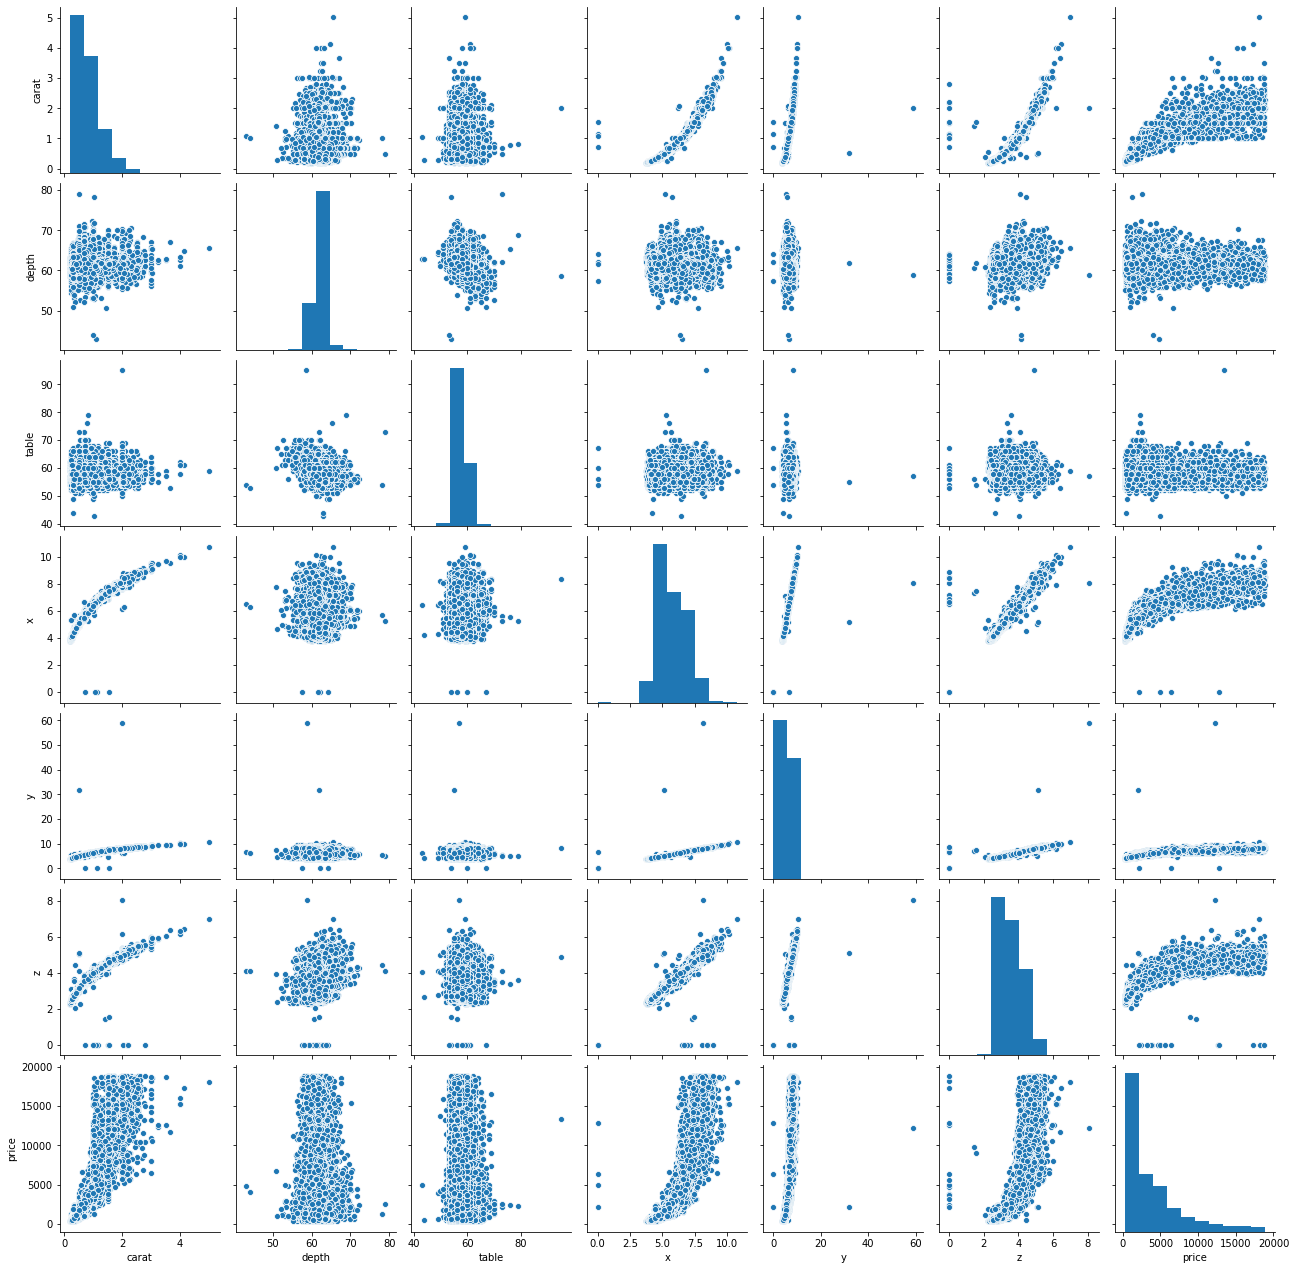

In [11]:
sns.pairplot(diamonds)

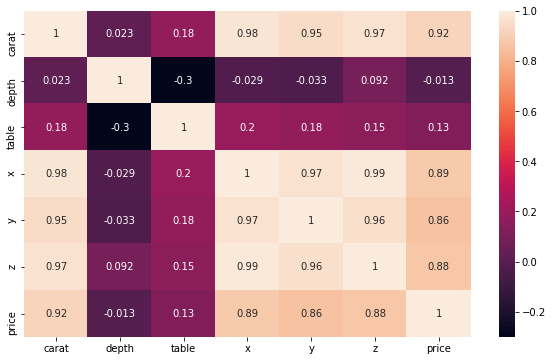

In [12]:
corr_matrix = diamonds.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True);

In [13]:
#Función::

def clean (df):

    #Creo dict para reemplazar los valores de cut a formato numérico:

    punt_cut = {'Premium': 5, 'Ideal': 4, 'Very Good': 3, 'Good':2, 'Fair': 1}
    df['cut'] = df['cut'].map(punt_cut)

    #Creo dict para reemplazar los valores de cut a formato numérico:
    punt_color = {'F':2, 'D':7, 'E':3, 'J':4, 'H':5, 'I':6, 'G':4}

    df['color'] = df['color'].map(punt_color)

    #Creo dict para reemplazar los valores de cut a formato numérico:
    punt_clarity = {'VS1':4, 'SI1':2, 'VVS2':7, 'SI2':3, 'VS2':5, 'IF':8, 'VVS1':6, 'I1':1}

    df['clarity'] = df['clarity'].map(punt_clarity)
    
    return df


In [14]:
diamonds = clean(diamonds)

In [23]:
from sklearn.metrics import *

def errors (y, X, model):

    print(f'METRIC SUMMARY')
    print(f'MSE: {mean_squared_error(y, model.predict(X))}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y, model.predict(X)))}')
    print(f'MSLE:  {mean_squared_log_error(y, model.predict(X))}')
    print(f'MAE:  {mean_absolute_error(y, model.predict(X))}')
    print(f'R2:  {r2_score(y, model.predict(X))}')


### Valido distintos modelos con el número de features original:


In [15]:
from sklearn.model_selection import train_test_split

X = diamonds.drop(columns=["price"])
y = diamonds['price']

X_copy = X.copy()
y_copy = y.copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32276, 9) (8069, 9) (32276,) (8069,)


Importo test para almacenar los resultados de los modelos:

In [37]:
test = pd.read_csv('../inputs/diamonds_test.csv')

test_copy = test.copy()
test = clean(test)
test.drop('id',axis=1, inplace = True)
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.10,5,5,3,62.2,58.0,6.69,6.60,4.13
1,0.51,4,6,2,62.5,57.0,5.07,5.10,3.18
2,2.03,5,4,2,61.9,59.0,8.14,8.09,5.02
3,1.21,5,2,2,60.0,60.0,6.96,6.91,4.16
4,0.55,4,2,2,61.8,55.0,5.27,5.22,3.24


In [34]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

models = {
    "linear": LinearSVR(),
    "linealReg": LinearRegression(),
    "forest100": RandomForestRegressor(n_estimators=100),
    "forest200": RandomForestRegressor(n_estimators=200),
    "tree": DecisionTreeRegressor(random_state=0),
    "neigbor":KNeighborsRegressor(),
    "boosting": GradientBoostingRegressor(),
    "histboosting": HistGradientBoostingRegressor()
}

for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(X_train, y_train)
    print(f"({name}) acccuracy= {np.mean(cross_val_score(model, X_train, y_train, n_jobs=4))}")
        

Training model: linear
(linear) acccuracy= 0.7734907674547742
Training model: linealReg
(linealReg) acccuracy= 0.8803619103680861
Training model: forest100
(forest100) acccuracy= 0.9660580169364771
Training model: forest200
(forest200) acccuracy= 0.966081136255168
Training model: tree
(tree) acccuracy= 0.9365557541990727
Training model: neigbor
(neigbor) acccuracy= 0.9258382731273272
Training model: boosting
(boosting) acccuracy= 0.9577608761883848
Training model: histboosting
(histboosting) acccuracy= 0.9660981057588455


Desecho los modelos que tienen un accuracy menos a 0.90 y obtendo predicciones con el modelo entrenador para la totalidad de los datos de diamonds_train y lo aplico a diamonds_test y exporto los resultados:

In [39]:
final_models = {
    "forest200": RandomForestRegressor(n_estimators=200),
    "tree": DecisionTreeRegressor(random_state=0),
    "neigbor":KNeighborsRegressor(),
    "boosting": GradientBoostingRegressor(),
    "histboosting": HistGradientBoostingRegressor()
}

for name, model in final_models.items():
    print(f"Training model: {name}")
    model.fit(X, y)
    y_pred = model.predict(test)
    test_copy[name] = y_pred
    final_copy = test_copy[['id', name]]
    final_copy.rename(columns={name: "price"}, inplace = True)
    final_copy.to_csv(f'outputs/predict{name}.csv', header=True, index=False)
    print(f'Exportado: predict{name}.csv')

Training model: forest200


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Exportado: predictforest200.csv
Training model: tree


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Exportado: predicttree.csv
Training model: neigbor


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Exportado: predictneigbor.csv
Training model: boosting


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Exportado: predictboosting.csv
Training model: histboosting
Exportado: predicthistboosting.csv


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [42]:
test_copy.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,forest200,tree,neigbor,boosting,histboosting
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13,4667.995000,4662.0,4851.0,4309.923188,4258.696769
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18,1018.760000,984.0,1159.6,1011.834602,1094.934630
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02,14959.280000,18507.0,14810.6,15195.484912,14315.272846
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16,6537.910000,6261.0,5486.6,6460.609390,6132.263355
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24,1493.834393,1700.0,1493.4,1606.596401,1432.062183
